## Tensorflow and MNIST

In [120]:
import tensorflow as tf
import tensorflow as keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


## Load the dataset from Keras

In [121]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

In [122]:
print('Traning Smaples:',len(X_train))
print('Test Smaples:',len(X_test))
print('Shape of individual images:',X_train[0].shape)

Traning Smaples: 60000
Test Smaples: 10000
Shape of individual images: (28, 28)


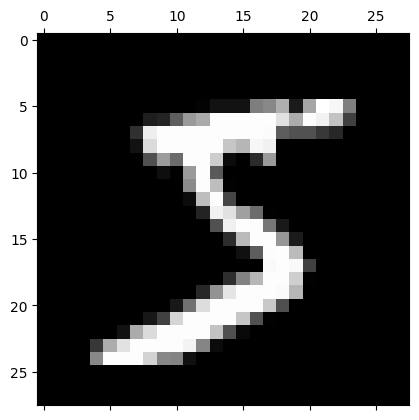

In [123]:
X_train[0]
plt.matshow(X_train[0],cmap='gray')

<Axes: >

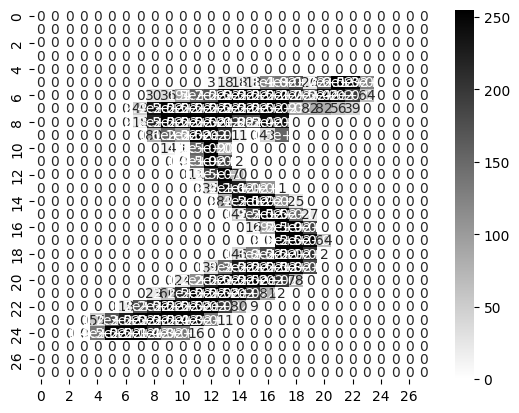

In [124]:
sns.heatmap(X_train[0], annot= True, cmap="binary")

In [125]:
X_train[15,17]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       134, 255, 253, 253,  39,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [126]:
Y_train[1]

0

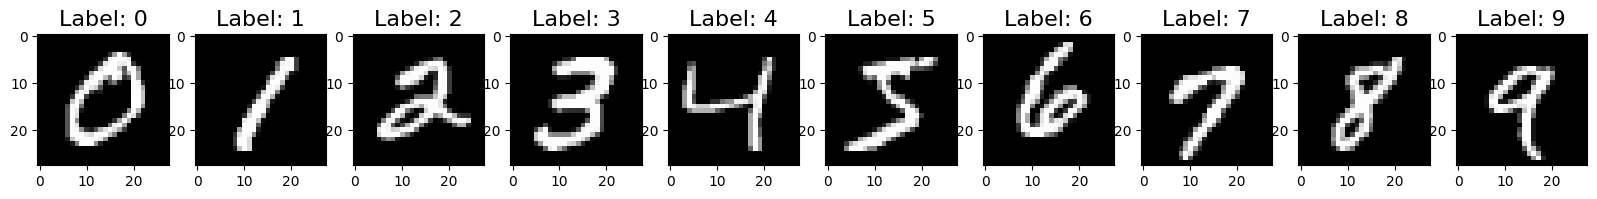

In [127]:
num_classes=10
_,ax=plt.subplots(1,num_classes,figsize=(20,20))
for i in range(num_classes):
    sample=X_train[Y_train==i][0]
    ax[i].imshow(sample,cmap='gray')
    ax[i].set_title(f'Label: {i}',fontsize=16)

In [128]:
X_train.shape

(60000, 28, 28)

## scale pixel values to the range [0, 1]

In [129]:
X_train=X_train/255
X_test=X_test/255

In [130]:
print(X_train.shape)
print(Y_train.shape)

(60000, 28, 28)
(60000,)


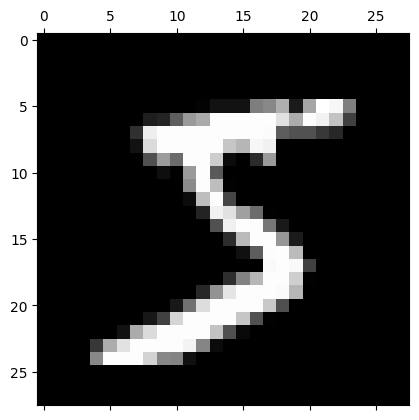

In [131]:
plt.matshow(X_train[0],cmap='gray')


<Axes: >

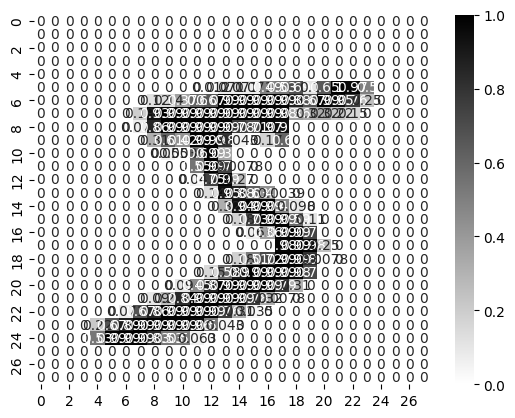

In [132]:
sns.heatmap(X_train[0], annot= True, cmap="binary")

In [133]:
X_train[15,17]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.5254902 , 1.        ,
       0.99215686, 0.99215686, 0.15294118, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

## flatten the 2D image matrices in the MNIST dataset into 1D arrays.

In [134]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(X_train.shape[1:]), 
  tf.keras.layers.Flatten(),
  
])
#model.compile(optimizer='adam')
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 2D to 1D(Flatten Dataset)

In [135]:
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_test_flattened = X_test.reshape(len(X_test), 28 * 28)

In [136]:
print(X_train.shape)
print(X_train_flattened.shape)

(60000, 28, 28)
(60000, 784)


## Create an initial Neural Network using Keras
 
We will initially use a simple network that only has an input layer and an output layer. The input layer will have 784 neurons (28 * 28 pixels in each image) and the outputlayer will have 10 neurons as we want to predict a digit, 0-9

In [137]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10, input_shape=(784,), activation='softmax')
    ]
)
 
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
    )
 
model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5


c:\Users\suran\OneDrive\Desktop\lexicon\Machine_Learning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 893us/step - accuracy: 0.8117 - loss: 0.7293
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 835us/step - accuracy: 0.9109 - loss: 0.3150
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9206 - loss: 0.2840
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9233 - loss: 0.2805
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9263 - loss: 0.2681


#### 1 & 2 Prediction Generation and Accessing Prediction Details

In [138]:
# Prediction Generation :  "predict method" generate predictions from a trained neural network model
predictions = model.predict(X_test_flattened)

# Access the prediction details for the second image using "predictions[1]"
second_prediction=predictions[1]
second_prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([2.3481865e-04, 8.7349571e-07, 9.9554873e-01, 1.2788414e-04,
       1.4615658e-13, 1.0009608e-03, 3.0580889e-03, 4.7003796e-16,
       2.8655015e-05, 7.9226681e-13], dtype=float32)

### 3. Finding the Predicted Class

In [139]:
# Find the index of the highest probability
import numpy as np
print(np.argmax(predictions[1]))

2


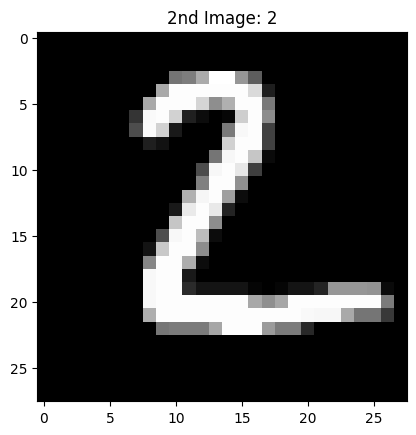

In [140]:
# 4. Visualizing Test Data: using "imshow() method"
import matplotlib.pyplot as plt
 
plt.imshow(X_test[1], cmap='gray')
plt.title(f'2nd Image: {Y_test[1]}')
plt.show()

In [141]:
# 5. Comparing with Actual Labels: Actual label for the second image
print("Predicted label for second image: ", predicted_labels[1])
print("Actual label for second image: ", Y_test[1])

Predicted label for second image:  2
Actual label for second image:  2


##### 6. Extract the labels

In [142]:
# Convert the predictions to class labels
#predicted_labels = np.argmax(predictions, axis=1)
predicted_labels=[np.argmax(i) for i in predictions]
predicted_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 6,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 2,
 7,
 4,
 2,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 4,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 8,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 7,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 7,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


##### 7. Examining Initial Predictions

In [143]:
# First five predicted class labels using slicing "[:5]"
print("First five Predicted labels: ", predicted_labels[:5])
print("First five Actual labels: ", Y_test[:5])

First five Predicted labels:  [7, 2, 1, 0, 4]
First five Actual labels:  [7 2 1 0 4]


#### Create a Confusion matrix to see how well the model performed

In [144]:
cm= tf.math.confusion_matrix(labels=Y_test,predictions=predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

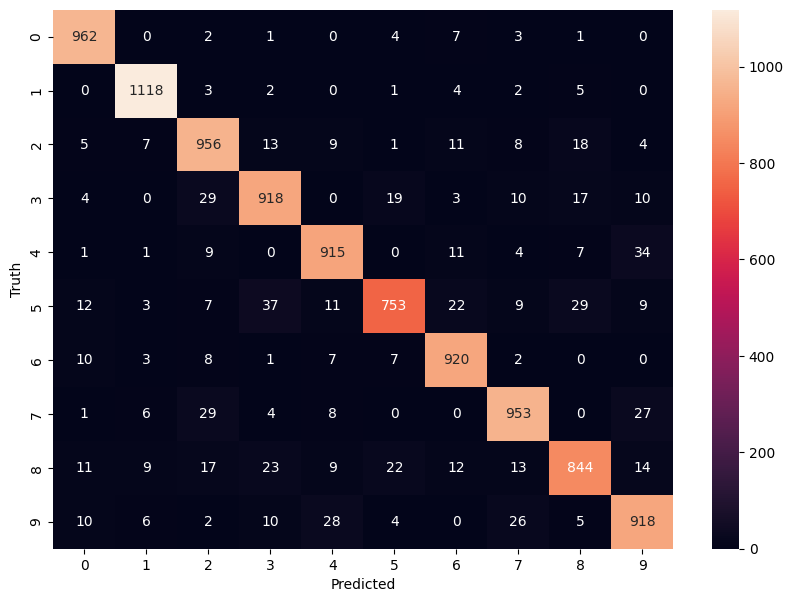

In [145]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')    #d for decimal
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Finding errors

In [146]:
errors = (predicted_labels - Y_test != 0)
errors 

array([False, False, False, ..., False, False, False])

In [147]:
y_error_indexes = [i for i, error in enumerate(errors) if error]
len(y_error_indexes)

743

#### Check few random predications

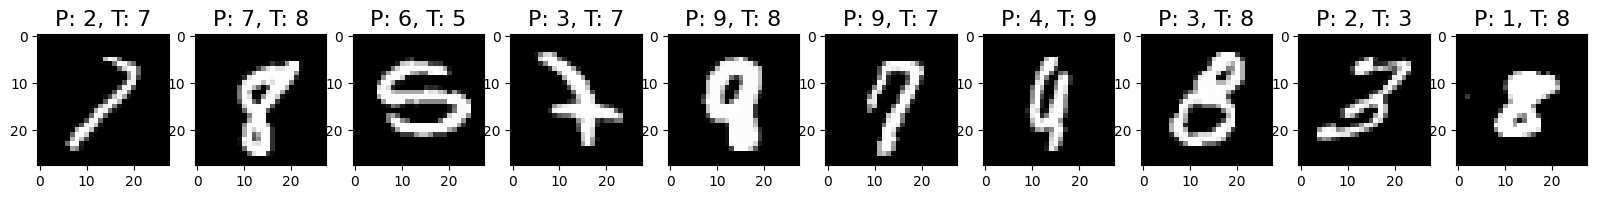

In [148]:
import random
 
idx_to_check = [y_error_indexes[random.randint(0, len(y_error_indexes) - 1)] for _ in range(10)]
 
num_classes = 10
 
_, ax = plt.subplots(1, num_classes, figsize=(20,20)) # Create a figure and set of subplots with 'num_classes' number of columns, each subplots size is 20 x 20
 
for i, idx in enumerate(idx_to_check):      # Iterate through the list 'idx_to_check' with index and values.
    sample = X_test[idx]                    # Extract the test sample corresponding to the current index.
    predicted_value = predicted_labels[idx] # Retrives the predicted the value for the current test.
    true_value = Y_test[idx]                # Retrives the true value from the current test.
    ax[i].imshow(sample, cmap='gray')       # Display the test samplein the i-th subplots with a grayscale colormap.
    ax[i].set_title(f'P: {predicted_value}, T: {true_value}', fontsize=16) # Set the title for the i-th subplots with predicted value and true value, with a font size of 16

### Create new model: model2

In [293]:
model2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(200, input_shape=(784,), activation='relu'),
        tf.keras.layers.Dense(10,  activation='softmax')
    ]
)
 
model2.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
    )
 
model2.fit(X_train_flattened, Y_train, epochs=10)

c:\Users\suran\OneDrive\Desktop\lexicon\Machine_Learning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8888 - loss: 0.3938
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9688 - loss: 0.1033
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9791 - loss: 0.0662
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9859 - loss: 0.0482
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9891 - loss: 0.0345
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9921 - loss: 0.0260
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9939 - loss: 0.0203
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9953 - loss: 0.0164
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9963 - loss: 0.0122
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9972 - loss: 0.0098


In [294]:
y_predicted2 = model2.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [295]:
y_predicted_labels2 = [np.argmax(i) for i in y_predicted2]

In [296]:
cm2 = tf.math.confusion_matrix(labels=Y_test, predictions=y_predicted_labels2)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    1,    3,    0,    1,    1,    3,    1,    1,    1],
       [   0, 1126,    4,    0,    0,    1,    2,    0,    2,    0],
       [   0,    0, 1020,    1,    1,    0,    2,    4,    2,    2],
       [   0,    0,   12,  982,    0,    6,    0,    3,    4,    3],
       [   1,    0,    6,    0,  959,    0,    3,    2,    2,    9],
       [   2,    0,    0,    6,    0,  875,    2,    1,    4,    2],
       [   1,    3,    3,    1,    3,    4,  943,    0,    0,    0],
       [   1,    7,   17,    1,    1,    0,    1,  988,    3,    9],
       [   5,    0,    3,    1,    1,    0,    1,    2,  960,    1],
       [   0,    3,    0,    3,    6,    3,    1,    4,   11,  978]])>

Text(95.72222222222221, 0.5, 'Truth')

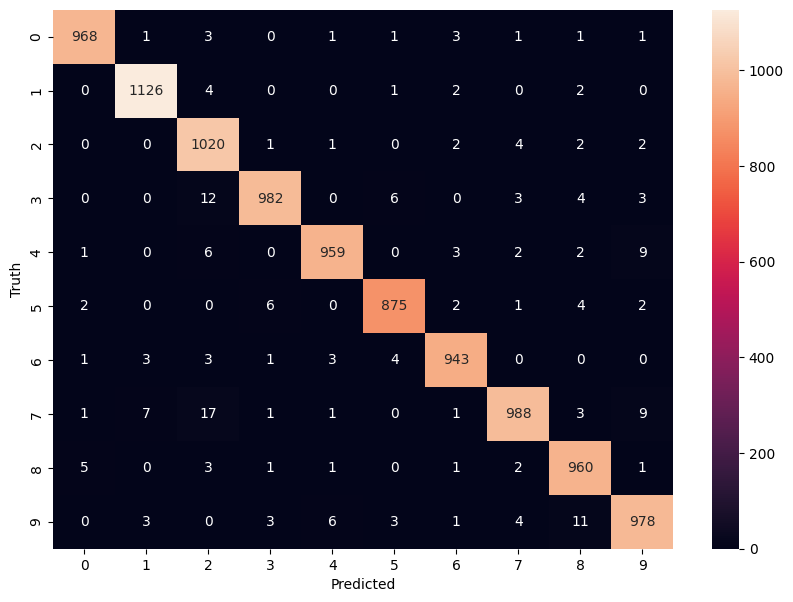

In [297]:
plt.figure(figsize=(10,7))
sns.heatmap(cm2, annot=True, fmt='d')    #d for decimal
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [298]:
errors2 = (y_predicted_labels2 - Y_test != 0)
y_error_indexes2 = [i for i, error in enumerate(errors2) if error]
len(y_error_indexes2)

201

#### Create another model and experiment with various parameters: Model3

In [365]:
model3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(400, input_shape=(784,), activation='sigmoid'),
        tf.keras.layers.Dense(200, activation="relu"),
        #tf.keras.layers.Dense(50, activation="tanh"),
        tf.keras.layers.Dense(10,  activation='softmax')
    ]
)
 
model3.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
    )
 
model3.fit(X_train_flattened, Y_train, epochs=10)

c:\Users\suran\OneDrive\Desktop\lexicon\Machine_Learning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8419 - loss: 0.5369
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9532 - loss: 0.1561
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9719 - loss: 0.0943
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9800 - loss: 0.0635
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9849 - loss: 0.0460
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9902 - loss: 0.0313
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9925 - loss: 0.0236
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9932 - loss: 0.0204
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9956 - loss: 0.0146
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9969 - loss: 0.0103


In [366]:
y_predicted3 = model3.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [367]:
y_predicted_labels3 = [np.argmax(i) for i in y_predicted3]

In [368]:
cm3 = tf.math.confusion_matrix(labels=Y_test, predictions=y_predicted_labels3)
cm3

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    2,    0,    1,    1,    3,    1,    1,    2],
       [   0, 1124,    2,    2,    0,    2,    2,    1,    2,    0],
       [   3,    0, 1018,    2,    0,    0,    4,    3,    2,    0],
       [   0,    1,    1,  995,    0,    3,    0,    3,    2,    5],
       [   0,    0,    2,    1,  960,    0,    6,    4,    2,    7],
       [   2,    0,    0,    7,    1,  875,    3,    1,    2,    1],
       [   1,    2,    0,    1,    4,    2,  948,    0,    0,    0],
       [   1,    0,    9,    1,    0,    0,    0, 1013,    1,    3],
       [   2,    1,    3,    7,    0,    4,    6,    2,  948,    1],
       [   2,    2,    0,    7,    8,    5,    0,    9,    3,  973]])>

Text(95.72222222222221, 0.5, 'Truth')

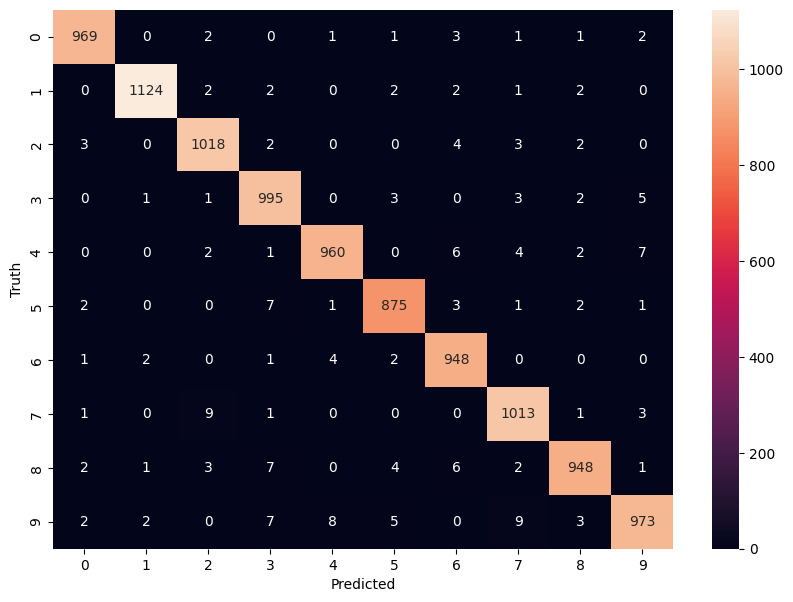

In [369]:
plt.figure(figsize=(10,7))
sns.heatmap(cm3, annot=True, fmt='d')    #d for decimal
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [370]:
errors3 = (y_predicted_labels3 - Y_test != 0)
y_error_indexes3 = [i for i, error in enumerate(errors3) if error]
len(y_error_indexes3)

177